In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

# To create a list of x ranging from a to b having num+1 points
def x_list(a,b,num):
    
    h=(b-a)/num
    xlist=[]
    for i in range(num+1):
        xlist.append(a+i*h)
        
    return np.array(xlist)

In [135]:
a=[1]

# factorial optimized
def fact(n):
    if(len(a)<=n):
        for i in range(len(a),n+1):
            a.append(i*a[i-1])
        
    return a[n]

In [9]:
# Returns list of values of hermite polynomial of order n for a given list of x
def hermitefn(n, x):
    hermite=[]
    hermite.append([])
    for m in range(len(x)):
        hermite[0].append(1)
    hermite.append([])
  
    for m in x:
        
        hermite[1].append(2*m)
    
    for i in range(2,n+1):
        hermite.append([])
        ct=0
        for m in x:
            hermite[i].append(2*m*hermite[i-1][ct]-2*(i-1)*hermite[i-2][ct])
            ct+=1
        
    return np.array(hermite[n])


In [10]:
# Returns list of values of legendre function of order n for a given list of x
def legendrefn(n,x):
    legendre=[]
    legendre.append([])
    for m in range(len(x)):
        legendre[0].append(1)
    legendre.append([])
    
    for m in x:
        legendre[1].append(m)
        
    for i in range(2,n+1):
        legendre.append([])
        ct=0
        for m in x:
            legendre[i].append(((2*i-1)*m*legendre[i-1][ct]-(i-1)*legendre[i-2][ct])/i)
            ct+=1
    return np.array(legendre[n])

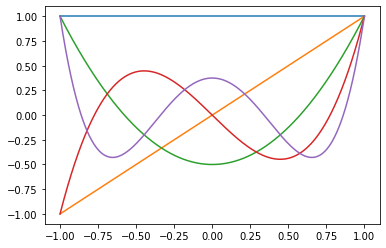

In [187]:
x = x_list(-1,1,1000)

for i in range(5):
   # plt.plot(x,legendrefn(i,x))

    


In [11]:
#Returns a list of values of associated legendre for give list of x points
#Recursion relations need to be used optimally
def asslegendre(l,m,x):
    asslegend=[]

    for a in range(l+1):
        asslegend.append([])
        for b in range(a+1):
            asslegend[a].append([])
            ct=0
            for y in x:
                
                #first get P00
                if a==0 and b==0:
                    asslegend[a][b].append(1)
                #then P10 from P00    
                elif b==a-1:
                    asslegend[a][b].append(y*(2*a-1)*asslegend[a-1][a-1][ct])
                #then P11 from P00
                elif a==b:
                    asslegend[a][b].append(-(2*a-1)*mt.sqrt(1-y**2)*asslegend[a-1][a-1][ct])
                #P22 and P21 from above, P20 from next
                #Similarly P33 and P32 from above and P31 and P32 from next and so on
                else:
                    asslegend[a][b].append((1/(a-b))*((y*(2*a-1)*asslegend[a-1][b][ct])-(a+b-1)*asslegend[a-2][b][ct]))
                
                ct+=1 
                    
    return np.array(asslegend[l][m])
                    
        
        
    

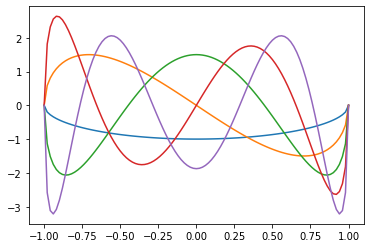

In [196]:
x = x_list(-1,1,100)

#plots for m=1 and l ranging from 1 to 5
for i in range(1,6):
    plt.plot(x,asslegendre(i,1,x))

Spherical Harmonics

In [129]:
# Returns spherical harmonics for given l and m on a grid of theta and phi
def Ylm(l,m,theta,phi):
    
 
    norm = mt.sqrt((fact(l-m)/fact(l+m))*(2*l+1)/(4*mt.pi))
    
    costhetas=np.cos(theta)
    
    #since asslegendre takes list of x's, we extract it from 1st element of costhetas
   
    y=asslegendre(l,m,costhetas[0])
    Plm = []
    
    for i in range(len(theta)):
        Plm.append(y)
    Plm = np.array(Plm)
    
    
    Plm = norm*np.array(Plm)*np.exp(1j*m*phi)

    return Plm

In [188]:
#how to use
thetas = np.array(x_list(0,mt.pi,10))
phis = np.array(x_list(0,2*mt.pi,10))
theta, phi = np.meshgrid(thetas, phis)
Z = Ylm(4,2,theta,phi)


In [5]:
# Integration using simpson
# Input the list of f for x in a to b, give h manually
def simpI(f,h):
    
    I=f[0]+f[-1]
    for i in range(1,len(f),2):
        I+=4*f[i]
    for i in range(2,len(f),2):
        I+=2*f[i]

    I = I*h/3
    
    return I


In [6]:
#how to use
x = np.array(x_list(-5,5,9999))
h = 10/9999
f = (x*x-1)*np.exp(-x*x)
#print(simpI(f,h))

-0.886226925520499


In [4]:
#Numerical Derivative

def derivative(f,x):
    h=x[1]-x[0]
    
    derivf=[]
    for i in range(len(x)):
        if i==0:
            derivf.append((f[1]-f[0])/h)
        elif i==len(x)-1:
            derivf.append((f[len(x)-1]-f[len(x)-2])/h)
        else:
            derivf.append((f[i+1]-f[i])/h)
    
    return np.array(derivf)

In [9]:
#how to use
x = x_list(-10,10,10)
f = x*x
print(f)
print(derivative(f,x))

[100.  64.  36.  16.   4.   0.   4.  16.  36.  64. 100.]
[-18. -14. -10.  -6.  -2.   2.   6.  10.  14.  18.  18.]


In [17]:
def dderivative(f,x):
    return derivative(derivative(f,x),x)

In [19]:
#how to use
x = x_list(-10,10,100)
f = x*x
dderivative(f,x)

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0.])